loss: 0.243013, 0.068816 sec per epoch 


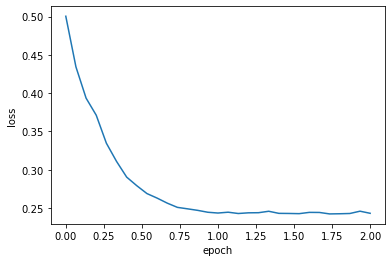

In [1]:
import torch
import d2lzh as d2l

features,labels = d2l.get_data_ch7()

def init_adadelta_states():
    s_w = torch.zeros((features.shape[1],1),dtype=torch.float32)
    s_b = torch.zeros(1,dtype=torch.float32)

    delta_w = torch.zeros((features.shape[1],1),dtype=torch.float32)
    delta_b = torch.zeros(1,dtype=torch.float32)

    return ((s_w,delta_w),(s_b,delta_b))

def adadelta(params,states,hyperparams):
    rho = hyperparams["rho"]
    eps = 1e-5

    for p,(s,delta) in zip(params,states):
        s[:] = rho * s + (1-rho) * (p.grad.data ** 2)
        g = p.grad.data * torch.sqrt((delta + eps) / (s + eps))
        p.data -= g 
        delta[:] = rho * delta + ( 1 - rho) * g * g

d2l.train_ch7(adadelta,init_adadelta_states(),{"rho":0.9},features,labels)

loss: 0.272059, 0.054853 sec per epoch 


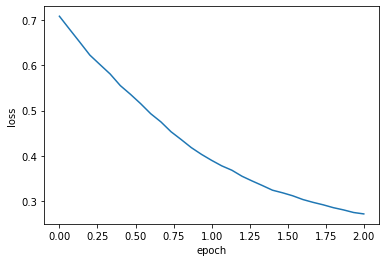

In [3]:
d2l.train_pytorch_ch7(torch.optim.Adadelta,{"rho":0.9},features,labels)